In [1]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:37525")
client

<Client: 'tcp://127.0.0.1:37525' processes=4 threads=12, memory=62.82 GiB>

In [2]:
import numpy as np
import xarray as xr
import os.path as op
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ddir = '/bettik/uchidat/qg-ML/'

In [4]:
U     = .1
T     = 5e5    # seconds
L     = U*T
tau0  = .0001
dt    = 5e-2
Rd    = 5e4   # Rossby radius (50km)
Re4   = 4e3
# f0 = 8e-5
beta  = .5
N     = 1024   # Number of horizontal grids
L0    = 80
H     = 5e3
dx    = L0/N  # Non-dimensionalized horizontal resolution ((L0*Rd)/N)/Rd
diny  = 360
Rom   = .025
Ekb   = .002*2
ntime = int(62.2*5)+1

percent = 20
nmemb = 100

ncoars = 4
DX = dx * ncoars

In [5]:
dsp1 = xr.open_dataset(op.join(ddir,"Eddy-n04_001.nc")
                      ).chunk({'time':9,'YC':128,'XC':128})
dsp1

<xarray.Dataset>
Dimensions:  (XC: 256, YC: 256, Z: 3, time: 312)
Coordinates:
  * XC       (XC) float64 0.1562 0.4688 0.7812 1.094 ... 78.91 79.22 79.53 79.84
  * YC       (YC) float64 0.1562 0.4688 0.7812 1.094 ... 78.91 79.22 79.53 79.84
  * Z        (Z) float64 0.03 0.13 0.6
    drF      (Z) float64 dask.array<chunksize=(3,), meta=np.ndarray>
  * time     (time) float64 311.0 312.0 313.0 314.0 ... 619.0 620.0 621.0 622.0
Data variables:
    upqp     (time, Z, YC, XC) float32 dask.array<chunksize=(9, 3, 128, 128), meta=np.ndarray>
    vpqp     (time, Z, YC, XC) float32 dask.array<chunksize=(9, 3, 128, 128), meta=np.ndarray>
    upP0p    (time, Z, YC, XC) float32 dask.array<chunksize=(9, 3, 128, 128), meta=np.ndarray>
    vpP0p    (time, Z, YC, XC) float32 dask.array<chunksize=(9, 3, 128, 128), meta=np.ndarray>
    upP1p    (time, Z, YC, XC) float32 dask.array<chunksize=(9, 3, 128, 128), meta=np.ndarray>
    vpP1p    (time, Z, YC, XC) float32 dask.array<chunksize=(9, 3, 128, 128), meta=np.ndarray>
    upP2p    (time, Z, YC, XC) float32 dask.array<chunksize=(9, 3, 128, 128), meta=np.ndarray>
    vpP2p    (time, Z, YC, XC) float32 dask.array<chunksize=(9, 3, 128, 128), meta=np.ndarray>
    upP3p    (time, Z, YC, XC) float32 dask.array<chunksize=(9, 3, 128, 128), meta=np.ndarray>
    vpP3p    (time, Z, YC, XC) float32 dask.array<chunksize=(9, 3, 128, 128), meta=np.ndarray>

In [6]:
dsb1 = xr.open_dataset(op.join(ddir,"Mean-n04_001.nc")
                      ).chunk({'time':9,'YC':128,'XC':128})
dsb1

<xarray.Dataset>
Dimensions:  (time: 312, Z: 3, YC: 258, XC: 258)
Coordinates:
  * time     (time) float64 311.0 312.0 313.0 314.0 ... 619.0 620.0 621.0 622.0
  * Z        (Z) float64 0.03 0.13 0.6
  * YC       (YC) float64 -0.1562 0.1562 0.4688 0.7812 ... 79.53 79.84 80.16
  * XC       (XC) float64 -0.1562 0.1562 0.4688 0.7812 ... 79.53 79.84 80.16
Data variables:
    qb       (time, Z, YC, XC) float32 dask.array<chunksize=(9, 3, 128, 128), meta=np.ndarray>
    P0b      (time, Z, YC, XC) float32 dask.array<chunksize=(9, 3, 128, 128), meta=np.ndarray>
    P1b      (time, Z, YC, XC) float32 dask.array<chunksize=(9, 3, 128, 128), meta=np.ndarray>
    P2b      (time, Z, YC, XC) float32 dask.array<chunksize=(9, 3, 128, 128), meta=np.ndarray>
    P3b      (time, Z, YC, XC) float32 dask.array<chunksize=(9, 3, 128, 128), meta=np.ndarray>

In [7]:
K = xr.open_zarr(op.join(ddir,'Diff-tensor/nC%02d/%010d.zarr'
                         % (ncoars,0))
                ).K
K

/tmp/ipykernel_40948/1165186084.py:1: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  K = xr.open_zarr(op.join(ddir,'Diff-tensor/nC%02d/%010d.zarr'


<xarray.DataArray 'K' (Z: 3, YC: 256, XC: 256, col: 2, row: 2)>
dask.array<open_dataset-82fcc001572f6e0827d12364cbda234fK, shape=(3, 256, 256, 2, 2), dtype=float64, chunksize=(2, 128, 128, 1, 2), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) float64 0.1562 0.4688 0.7812 1.094 ... 78.91 79.22 79.53 79.84
  * YC       (YC) float64 0.1562 0.4688 0.7812 1.094 ... 78.91 79.22 79.53 79.84
  * Z        (Z) float64 0.03 0.13 0.6
Dimensions without coordinates: col, row

In [8]:
P0 = dsb1.P0b.data   
P0x = np.diff(P0[...,1:-1,:], axis=-1) / DX
P0x = xr.DataArray(.5*(P0x[...,1:] + P0x[...,:-1]), 
                   dims=dsb1.P0b.dims, 
                   coords=dsb1.P0b.isel(YC=slice(1,-1),
                                        XC=slice(1,-1)).coords
                  ).chunk({'YC':128,'XC':128})
P0y = np.diff(P0[...,1:-1], axis=-2) / DX
P0y = xr.DataArray(.5*(P0y[...,1:,:] + P0y[...,:-1,:]), 
                   dims=dsb1.P0b.dims, 
                   coords=dsb1.P0b.isel(YC=slice(1,-1),
                                        XC=slice(1,-1)).coords
                  ).chunk({'YC':128,'XC':128})

P1 = dsb1.P1b.data
P1x = np.diff(P1[...,1:-1,:], axis=-1) / DX
P1x = xr.DataArray(.5*(P1x[...,1:] + P1x[...,:-1]), 
                   dims=dsb1.P1b.dims, 
                   coords=dsb1.P1b.isel(YC=slice(1,-1),
                                        XC=slice(1,-1)).coords
                  ).chunk({'YC':128,'XC':128})
P1y = np.diff(P1[...,1:-1], axis=-2) / DX
P1y = xr.DataArray(.5*(P1y[...,1:,:] + P1y[...,:-1,:]), 
                   dims=dsb1.P1b.dims, 
                   coords=dsb1.P1b.isel(YC=slice(1,-1),
                                        XC=slice(1,-1)).coords
                  ).chunk({'YC':128,'XC':128})

P2 = dsb1.P2b.data
P2x = np.diff(P2[...,1:-1,:], axis=-1) / DX
P2x = xr.DataArray(.5*(P2x[...,1:] + P2x[...,:-1]), 
                   dims=dsb1.P2b.dims, 
                   coords=dsb1.P2b.isel(YC=slice(1,-1),
                                        XC=slice(1,-1)).coords
                  ).chunk({'YC':128,'XC':128})
P2y = np.diff(P2[...,1:-1], axis=-2) / DX
P2y = xr.DataArray(.5*(P2y[...,1:,:] + P2y[...,:-1,:]), 
                   dims=dsb1.P2b.dims, 
                   coords=dsb1.P2b.isel(YC=slice(1,-1),
                                        XC=slice(1,-1)).coords
                  ).chunk({'YC':128,'XC':128})

P3 = dsb1.P3b.data  
P3x = np.diff(P3[...,1:-1,:], axis=-1) / DX
P3x = xr.DataArray(.5*(P3x[...,1:] + P3x[...,:-1]), 
                   dims=dsb1.P3b.dims, 
                   coords=dsb1.P3b.isel(YC=slice(1,-1),
                                        XC=slice(1,-1)).coords
                  ).chunk({'YC':128,'XC':128})
P3y = np.diff(P3[...,1:-1], axis=-2) / DX
P3y = xr.DataArray(.5*(P3y[...,1:,:] + P3y[...,:-1,:]), 
                   dims=dsb1.P3b.dims, 
                   coords=dsb1.P3b.isel(YC=slice(1,-1),
                                        XC=slice(1,-1)).coords
                  ).chunk({'YC':128,'XC':128})

In [10]:
Fx0 = -(K[...,0,0] * P0x.isel(time=0)
        + K[...,1,0] * P0y.isel(time=0)
       )

Fy0 = -(K[...,0,1] * P0x.isel(time=0)
        + K[...,1,1] * P0y.isel(time=0)
       )
############################################################
Fx1 = -(K[...,0,0] * P1x.isel(time=0)
        + K[...,1,0] * P1y.isel(time=0)
       )

Fy1 = -(K[...,0,1] * P1x.isel(time=0)
        + K[...,1,1] * P1y.isel(time=0)
       )
############################################################
Fx2 = -(K[...,0,0] * P2x.isel(time=0)
        + K[...,1,0] * P2y.isel(time=0)
       )

Fy2 = -(K[...,0,1] * P2x.isel(time=0)
        + K[...,1,1] * P2y.isel(time=0)
       )
############################################################
Fx3 = -(K[...,0,0] * P3x.isel(time=0)
        + K[...,1,0] * P3y.isel(time=0)
       )

Fy3 = -(K[...,0,1] * P3x.isel(time=0)
        + K[...,1,1] * P3y.isel(time=0)
       )

In [12]:
uP0x = (dsp1.upP0p.diff('XC', label='lower') 
        / DX
       )
uP0x = .5*(uP0x.shift(YC=-1) + uP0x).isel(YC=slice(None,-1))
vP0y = (dsp1.vpP0p.diff('YC', label='lower') 
        / DX
       )
vP0y = .5*(vP0y.shift(XC=-1) + vP0y).isel(XC=slice(None,-1))
uP1x = (dsp1.upP1p.diff('XC', label='lower') 
        / DX
       )
uP1x = .5*(uP1x.shift(YC=-1) + uP1x).isel(YC=slice(None,-1))
vP1y = (dsp1.vpP1p.diff('YC', label='lower') 
        / DX
       )
vP1y = .5*(vP1y.shift(XC=-1) + vP1y).isel(XC=slice(None,-1))
uP2x = (dsp1.upP2p.diff('XC', label='lower') 
        / DX
       )
uP2x = .5*(uP2x.shift(YC=-1) + uP2x).isel(YC=slice(None,-1))
vP2y = (dsp1.vpP2p.diff('YC', label='lower') 
        / DX
       )
vP2y = .5*(vP2y.shift(XC=-1) + vP2y).isel(XC=slice(None,-1))
uP3x = (dsp1.upP3p.diff('XC', label='lower') 
        / DX
       )
uP3x = .5*(uP3x.shift(YC=-1) + uP3x).isel(YC=slice(None,-1))
vP3y = (dsp1.vpP3p.diff('YC', label='lower') 
        / DX
       )
vP3y = .5*(vP3y.shift(XC=-1) + vP3y).isel(XC=slice(None,-1))
        
FP0x = (Fx0.diff('XC', label='lower') 
        / DX
       )
FP0x = .5*(FP0x.shift(YC=-1) + FP0x).isel(YC=slice(None,-1))
FP0y = (Fy0.diff('YC', label='lower')
        / DX
       )
FP0y = .5*(FP0y.shift(XC=-1) + FP0y).isel(XC=slice(None,-1))
FP1x = (Fx1.diff('XC', label='lower') 
        / DX
       )
FP1x = .5*(FP1x.shift(YC=-1) + FP1x).isel(YC=slice(None,-1))
FP1y = (Fy1.diff('YC', label='lower') 
        / DX
       )
FP1y = .5*(FP1y.shift(XC=-1) + FP1y).isel(XC=slice(None,-1))
FP2x = (Fx2.diff('XC', label='lower') 
        / DX
       )
FP2x = .5*(FP2x.shift(YC=-1) + FP2x).isel(YC=slice(None,-1))
FP2y = (Fy2.diff('YC', label='lower') 
        / DX
       )
FP2y = .5*(FP2y.shift(XC=-1) + FP2y).isel(XC=slice(None,-1))
FP3x = (Fx3.diff('XC', label='lower') 
        / DX
       )
FP3x = .5*(FP3x.shift(YC=-1) + FP3x).isel(YC=slice(None,-1))
FP3y = (Fy3.diff('YC', label='lower')
        / DX
       )
FP3y = .5*(FP3y.shift(XC=-1) + FP3y).isel(XC=slice(None,-1)) 

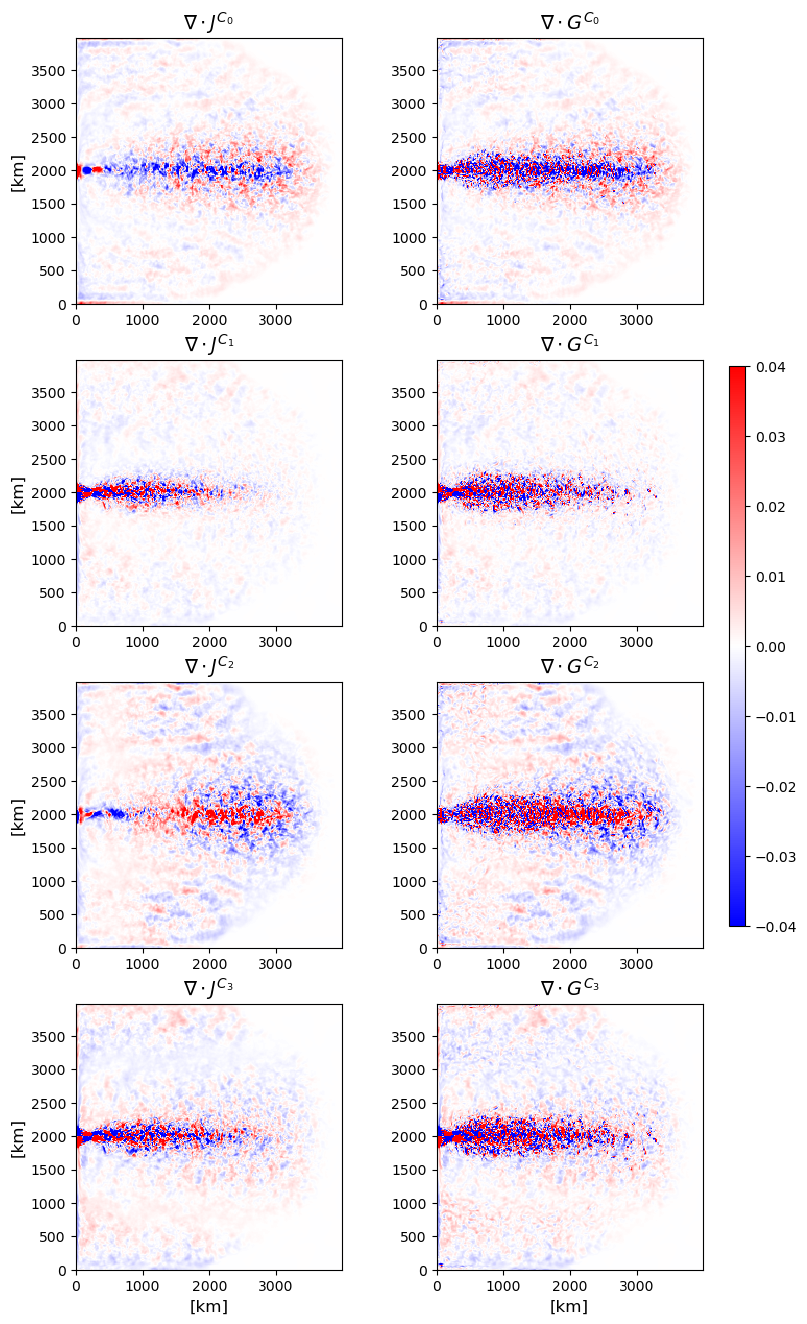

In [21]:
l = 0
vv = .04
fig, axes = plt.subplots(figsize=(9,16), nrows=4, ncols=2)

im = axes[0,0].pcolormesh(K.isel(YC=slice(None,-1),XC=slice(None,-1)).XC*L*1e-3, 
                          K.isel(YC=slice(None,-1),XC=slice(None,-1)).YC*L*1e-3, 
                          (uP0x+vP0y).isel(time=0,Z=l),
                          cmap='bwr', 
                          vmax=vv, vmin=-vv,
                          rasterized=True
                         )
axes[0,1].pcolormesh(K.isel(YC=slice(None,-1),XC=slice(None,-1)).XC*L*1e-3, 
                     K.isel(YC=slice(None,-1),XC=slice(None,-1)).YC*L*1e-3, 
                     (FP0x+FP0y).isel(Z=l),
                     cmap='bwr', 
                     vmax=vv, vmin=-vv,
                     rasterized=True
                    )
axes[1,0].pcolormesh(K.isel(YC=slice(None,-1),XC=slice(None,-1)).XC*L*1e-3,
                     K.isel(YC=slice(None,-1),XC=slice(None,-1)).YC*L*1e-3, 
                     (uP1x+vP1y).isel(time=0,Z=l),
                     cmap='bwr', 
                     vmax=vv, vmin=-vv,
                     rasterized=True
                    )
axes[1,1].pcolormesh(K.isel(YC=slice(None,-1),XC=slice(None,-1)).XC*L*1e-3, 
                     K.isel(YC=slice(None,-1),XC=slice(None,-1)).YC*L*1e-3, 
                     (FP1x+FP1y).isel(Z=l),
                     cmap='bwr', 
                     vmax=vv, vmin=-vv,
                     rasterized=True
                    )
axes[2,0].pcolormesh(K.isel(YC=slice(None,-1),XC=slice(None,-1)).XC*L*1e-3, 
                     K.isel(YC=slice(None,-1),XC=slice(None,-1)).YC*L*1e-3, 
                     (uP2x+vP2y).isel(time=0,Z=l),
                     cmap='bwr', 
                     vmax=vv, vmin=-vv,
                     rasterized=True
                    )
axes[2,1].pcolormesh(K.isel(YC=slice(None,-1),XC=slice(None,-1)).XC*L*1e-3, 
                     K.isel(YC=slice(None,-1),XC=slice(None,-1)).YC*L*1e-3, 
                     (FP2x+FP2y).isel(Z=l),
                     cmap='bwr', 
                     vmax=vv, vmin=-vv,
                     rasterized=True
                    )
axes[3,0].pcolormesh(K.isel(YC=slice(None,-1),XC=slice(None,-1)).XC*L*1e-3, 
                     K.isel(YC=slice(None,-1),XC=slice(None,-1)).YC*L*1e-3, 
                     (uP3x+vP3y).isel(time=0,Z=l),
                     cmap='bwr', 
                     vmax=vv, vmin=-vv,
                     rasterized=True
                    )
axes[3,1].pcolormesh(K.isel(YC=slice(None,-1),XC=slice(None,-1)).XC*L*1e-3, 
                     K.isel(YC=slice(None,-1),XC=slice(None,-1)).YC*L*1e-3, 
                     (FP3x+FP3y).isel(Z=l),
                     cmap='bwr', 
                     vmax=vv, vmin=-vv,
                     rasterized=True
                    )

axes[0,0].set_aspect(1)
axes[1,0].set_aspect(1)
axes[0,1].set_aspect(1)
axes[1,1].set_aspect(1)
axes[2,0].set_aspect(1)
axes[2,1].set_aspect(1)
axes[3,0].set_aspect(1)
axes[3,1].set_aspect(1)
# axes[4,0].set_aspect(1)
# axes[4,1].set_aspect(1)

axes[0,0].set_title(r"$\nabla\cdot J^{C_0}$", fontsize=14)
axes[0,1].set_title(r"$\nabla\cdot G^{C_0}$", fontsize=14)
axes[1,0].set_title(r"$\nabla\cdot J^{C_1}$", fontsize=14)
axes[1,1].set_title(r"$\nabla\cdot G^{C_1}$", fontsize=14)
axes[2,0].set_title(r"$\nabla\cdot J^{C_2}$", fontsize=14)
axes[2,1].set_title(r"$\nabla\cdot G^{C_2}$", fontsize=14)
axes[3,0].set_title(r"$\nabla\cdot J^{C_3}$", fontsize=14)
axes[3,1].set_title(r"$\nabla\cdot G^{C_3}$", fontsize=14)

axes[0,0].set_ylabel(r"[km]", fontsize=12)
axes[1,0].set_ylabel(r"[km]", fontsize=12)
axes[2,0].set_ylabel(r"[km]", fontsize=12)
axes[3,0].set_ylabel(r"[km]", fontsize=12)
# axes[4,0].set_ylabel(r"[km]", fontsize=12)
axes[3,0].set_xlabel(r"[km]", fontsize=12)
axes[3,1].set_xlabel(r"[km]", fontsize=12)

fig.subplots_adjust(right=0.86, hspace=.21)
cbax = fig.add_axes([.87, .325, .018, .35])
cbar = fig.colorbar(im, cax=cbax)
# cbar.set_label(r"[m s$^{-1}$]", fontsize=12)

plt.savefig(op.join(ddir,'Figs/FluxDiv_Z=%1d_%010d.pdf' % (l,0)))